In [14]:
import gzip
import gensim
import logging
docs = []
import os
with gzip.open ("C:/Users/Suyash/reviews_data.txt.gz", 'rb') as f:
       for i,line in enumerate (f):
            docs.append(line)

In [15]:
from nltk.corpus import stopwords
from string import punctuation
stuff_to_be_removed = list(stopwords.words("english"))+list(punctuation)

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to D:\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [17]:
import pandas as pd
df = pd.DataFrame(docs)

In [19]:
df.to_csv("new.csv")

In [20]:
text = df[0].astype(str).tolist()[:100]

In [21]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2] #remove words lesser than 2 in length
    tokens = [Lemmatizer.lemmatize(t) for t in tokens] #lemmatize words
    tokens = [t for t in tokens if t not in stuff_to_be_removed] #remove stopwords and punctuation
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove digits
    return tokens

In [22]:
text = [my_tokenizer(s) for s in text]

In [23]:
from gensim.models import Word2Vec

In [24]:
model = Word2Vec(text)

D:\Anaconda\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [25]:
#concordance and similar words
model.wv.most_similar("good")

[('wa', 0.9993034601211548),
 ('hotel', 0.9992238283157349),
 ("n't", 0.9990476965904236),
 ('nice', 0.998999834060669),
 ('room', 0.9989725947380066),
 ('beijing', 0.9989104270935059),
 ('driver', 0.998897910118103),
 ('staff', 0.99888014793396),
 ('chinese', 0.9988564252853394),
 ('china', 0.9988541603088379)]

In [26]:
#how are they similar
model.wv.similarity("good", 'great')    

0.99881256

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


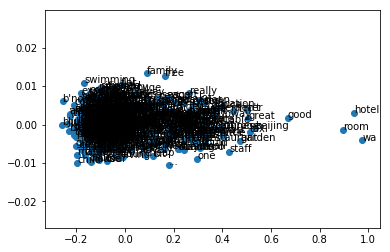

In [27]:
from sklearn.decomposition import PCA
from matplotlib import pyplot


X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()